<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Email Address                                                                                   90 non-null     object
 1   Year of Study                                                                                   90 non-null     object
 2   At which times you order online mostly (Null - wont order that meal online anyday) [Breakfast]  90 non-null     object
 3   At which times you order online mostly (Null - wont order that meal online anyday) [Lunch]      90 non-null     object
 4   At which times you order online mostly (Null - wont order that meal online anyday) [Snacks]     90 non-null     object
 5   At which times you order

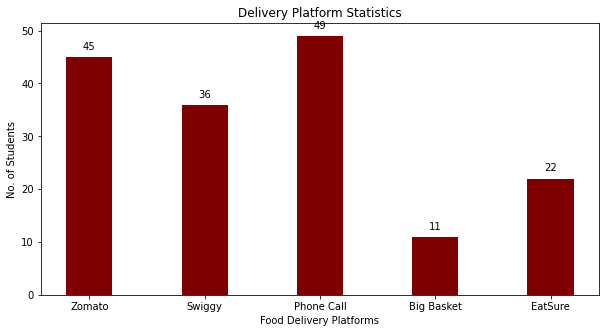

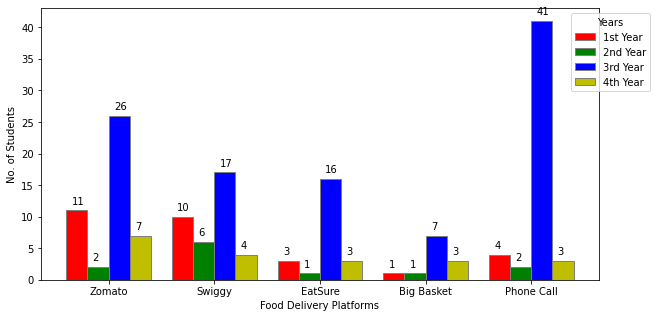

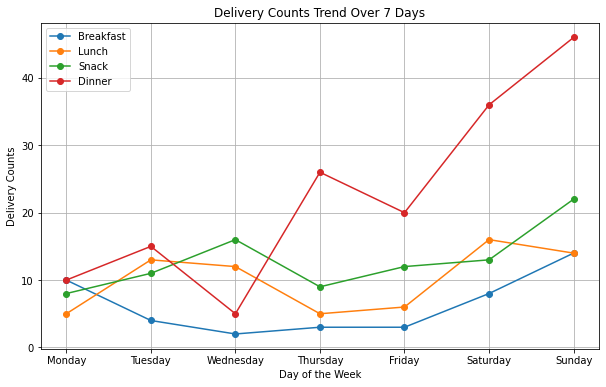

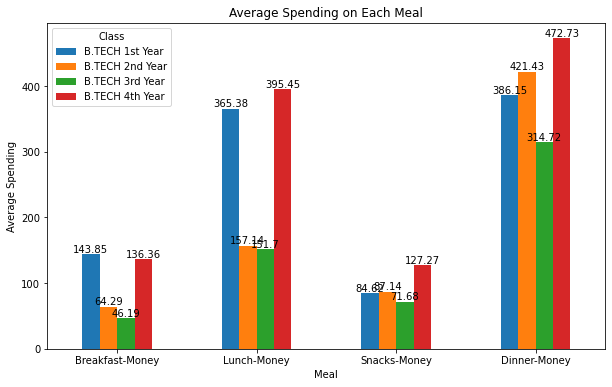

C:\Users\HP\AppData\Local\Temp\ipykernel_12052\450033202.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'Breakfast-Day'] = df5['Breakfast-Day'].apply(lambda x: len(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_12052\450033202.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'Lunch-Day'] = df5['Lunch-Day'].apply(lambda x: len(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_12052\450033202.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Mean Absolute Error (MAE): 112.59


InvalidIndexError: (slice(None, None, None), None)

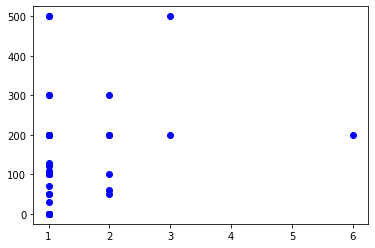

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('res.csv')

df.drop(df.columns[[0,2,3]],axis=1,inplace = True) # Dropping unwanted columns 
    
print(df.info()) # Displaying information of the data

df = df.rename(columns = {'Which delivery Platform you would like to use' : 'App','Year of Study' : 'Year','At which times you order online mostly (Null - wont order that meal online anyday) [Breakfast]' : 'Breakfast-Day','At which times you order online mostly (Null - wont order that meal online anyday) [Lunch]' : 'Lunch-Day','At which times you order online mostly (Null - wont order that meal online anyday) [Snacks]' : 'Snacks-Day','At which times you order online mostly (Null - wont order that meal online anyday) [Dinner]' : 'Dinner-Day','How much will you spend approxiamately on Breakfast while ordering on online for a week' : 'Breakfast-Money','How much will you spend approxiamately on Lunch while ordering on online for a week' : 'Lunch-Money','How much will you spend approxiamately on Snacks while ordering on online for a week' : 'Snacks-Money','How much will you spend approxiamately on Dinner while ordering on online for a week' : 'Dinner-Money'})

duplicates = df.duplicated() # Checking for number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

df.dropna(inplace = True) # Dropping the null values data

is_numeric_col1 = pd.to_numeric(df['Breakfast-Money'], errors='coerce').notna()
is_numeric_col2 = pd.to_numeric(df['Lunch-Money'], errors='coerce').notna()
is_numeric_col3 = pd.to_numeric(df['Snacks-Money'], errors='coerce').notna()
is_numeric_col4 = pd.to_numeric(df['Dinner-Money'], errors='coerce').notna()
df = df[is_numeric_col1 & is_numeric_col2 & is_numeric_col3 & is_numeric_col4]

df['Breakfast-Money'] = df['Breakfast-Money'].astype(int)
df['Lunch-Money'] = df['Lunch-Money'].astype(int)
df['Snacks-Money'] = df['Snacks-Money'].astype(int)
df['Dinner-Money'] = df['Dinner-Money'].astype(int)

print(df.info())

df.iloc[:,2] = df.iloc[:,2].str.split(', ')
df.iloc[:,3] = df.iloc[:,3].str.split(', ')
df.iloc[:,4] = df.iloc[:,4].str.split(', ')
df.iloc[:,5] = df.iloc[:,5].str.split(', ')
df.iloc[:,6] = df.iloc[:,6].str.split(', ')
apps = pd.DataFrame(df.iloc[:,6])

flattened_app_list = [item for sublist in apps['App'] for item in sublist]
zomato_count = flattened_app_list.count('Zomato')
swiggy_count = flattened_app_list.count('Swiggy')
call_count = flattened_app_list.count('Phone call')
bigbasket_count = flattened_app_list.count('Big Basket')
eatsure_count = flattened_app_list.count('Eatsure')

data1 = {'Zomato' : zomato_count, 'Swiggy' : swiggy_count, 'Phone Call' : call_count, 'Big Basket' : bigbasket_count, 'EatSure' : eatsure_count}

delivery_apps = list(data1.keys())
student_count = list(data1.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(delivery_apps, student_count, color ='maroon', width = 0.4)

for i, value in enumerate(student_count):
    plt.text(delivery_apps[i], value + 1, str(value), ha='center', va='bottom')

plt.xlabel("Food Delivery Platforms")
plt.ylabel("No. of Students")
plt.title("Delivery Platform Statistics")
plt.show()

df2 = df[['Year','App']]

def count_class_with_values(class_name, values_to_match):
    return df2[df2['Year'] == class_name]['App'].apply(lambda x: len([value for value in x if value in values_to_match])).sum()

zomato_1 = count_class_with_values('B.TECH 1st Year', 'Zomato')
zomato_2 = count_class_with_values('B.TECH 2nd Year', 'Zomato')
zomato_3 = count_class_with_values('B.TECH 3rd Year', 'Zomato')
zomato_4 = count_class_with_values('B.TECH 4th Year', 'Zomato')

Swiggy_1 = count_class_with_values('B.TECH 1st Year', 'Swiggy')
Swiggy_2 = count_class_with_values('B.TECH 2nd Year', 'Swiggy')
Swiggy_3 = count_class_with_values('B.TECH 3rd Year', 'Swiggy')
Swiggy_4 = count_class_with_values('B.TECH 4th Year', 'Swiggy')

Eatsure_1 = count_class_with_values('B.TECH 1st Year', 'Eatsure')
Eatsure_2 = count_class_with_values('B.TECH 2nd Year', 'Eatsure')
Eatsure_3 = count_class_with_values('B.TECH 3rd Year', 'Eatsure')
Eatsure_4 = count_class_with_values('B.TECH 4th Year', 'Eatsure')

Bigbasket_1 = count_class_with_values('B.TECH 1st Year', 'Big Basket')
Bigbasket_2 = count_class_with_values('B.TECH 2nd Year', 'Big Basket')
Bigbasket_3 = count_class_with_values('B.TECH 3rd Year', 'Big Basket')
Bigbasket_4 = count_class_with_values('B.TECH 4th Year', 'Big Basket')

Phonecall_1 = count_class_with_values('B.TECH 1st Year', 'Phone call')
Phonecall_2 = count_class_with_values('B.TECH 2nd Year', 'Phone call')
Phonecall_3 = count_class_with_values('B.TECH 3rd Year', 'Phone call')
Phonecall_4 = count_class_with_values('B.TECH 4th Year', 'Phone call')

barWidth = 0.2
fig = plt.subplots(figsize=(10, 5))

years = ['1st Year', '2nd Year', '3rd Year', '4th Year']
platforms = ['Zomato', 'Swiggy', 'EatSure', 'Big Basket', 'Phone Call']

data = {
    '1st Year': [zomato_1, Swiggy_1, Eatsure_1, Bigbasket_1, Phonecall_1],
    '2nd Year': [zomato_2, Swiggy_2, Eatsure_2, Bigbasket_2, Phonecall_2],
    '3rd Year': [zomato_3, Swiggy_3, Eatsure_3, Bigbasket_3, Phonecall_3],
    '4th Year': [zomato_4, Swiggy_4, Eatsure_4, Bigbasket_4, Phonecall_4]
}


colors = ['r', 'g', 'b', 'y']

br = np.arange(len(platforms))

for i, year in enumerate(years):
    plt.bar(br, data[year], color=colors[i], width=barWidth, edgecolor='grey', label=year)
    br = [x + barWidth for x in br]

    for j, value in enumerate(data[year]):
        plt.text(j + i * barWidth - 0.05, value + 1, str(value), fontsize=10)

plt.xlabel('Food Delivery Platforms')
plt.ylabel('No. of Students')
plt.xticks([r + 1.5 * barWidth for r in range(len(platforms))], platforms)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1),title='Years')
plt.show()

df3 = df.iloc[:,2:6]

flattened_brk_list = [item for sublist in df3['Breakfast-Day'] for item in sublist]
flattened_lnc_list = [item for sublist in df3['Lunch-Day'] for item in sublist]
flattened_snk_list = [item for sublist in df3['Snacks-Day'] for item in sublist]
flattened_dnr_list = [item for sublist in df3['Dinner-Day'] for item in sublist]

brk_mon_count = flattened_brk_list.count('Monday')
brk_tue_count = flattened_brk_list.count('Tuesday')
brk_wed_count = flattened_brk_list.count('Wednesday')
brk_thr_count = flattened_brk_list.count('Thursday')
brk_fri_count = flattened_brk_list.count('Friday')
brk_sat_count = flattened_brk_list.count('Saturday')
brk_sun_count = flattened_brk_list.count('Sunday')

lnc_mon_count = flattened_lnc_list.count('Monday')
lnc_tue_count = flattened_lnc_list.count('Tuesday')
lnc_wed_count = flattened_lnc_list.count('Wednesday')
lnc_thr_count = flattened_lnc_list.count('Thursday')
lnc_fri_count = flattened_lnc_list.count('Friday')
lnc_sat_count = flattened_lnc_list.count('Saturday')
lnc_sun_count = flattened_lnc_list.count('Sunday')

snk_mon_count = flattened_snk_list.count('Monday')
snk_tue_count = flattened_snk_list.count('Tuesday')
snk_wed_count = flattened_snk_list.count('Wednesday')
snk_thr_count = flattened_snk_list.count('Thursday')
snk_fri_count = flattened_snk_list.count('Friday')
snk_sat_count = flattened_snk_list.count('Saturday')
snk_sun_count = flattened_snk_list.count('Sunday')

dnr_mon_count = flattened_dnr_list.count('Monday')
dnr_tue_count = flattened_dnr_list.count('Tuesday')
dnr_wed_count = flattened_dnr_list.count('Wednesday')
dnr_thr_count = flattened_dnr_list.count('Thursday')
dnr_fri_count = flattened_dnr_list.count('Friday')
dnr_sat_count = flattened_dnr_list.count('Saturday')
dnr_sun_count = flattened_dnr_list.count('Sunday')

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

brk_counts = [brk_mon_count, brk_tue_count, brk_wed_count, brk_thr_count, brk_fri_count, brk_sat_count, brk_sun_count]
lnc_counts = [lnc_mon_count, lnc_tue_count, lnc_wed_count, lnc_thr_count, lnc_fri_count, lnc_sat_count, lnc_sun_count]
snk_counts = [snk_mon_count, snk_tue_count, snk_wed_count, snk_thr_count, snk_fri_count, snk_sat_count, snk_sun_count]
dnr_counts = [dnr_mon_count, dnr_tue_count, dnr_wed_count, dnr_thr_count, dnr_fri_count, dnr_sat_count, dnr_sun_count]

plt.figure(figsize=(10, 6))
plt.plot(days_of_week, brk_counts, label='Breakfast', marker='o')
plt.plot(days_of_week, lnc_counts, label='Lunch', marker='o')
plt.plot(days_of_week, snk_counts, label='Snack', marker='o')
plt.plot(days_of_week, dnr_counts, label='Dinner', marker='o')

plt.xlabel('Day of the Week')
plt.ylabel('Delivery Counts')
plt.title('Delivery Counts Trend Over 7 Days')
plt.legend()
plt.grid(True)

plt.show()



df4 = df.iloc[:,[1,7,8,9,10]]

average_spending = df4.groupby('Year').mean()

#Transpose the DataFrame to have meals as rows and classes as columns
average_spending = average_spending.transpose()

# Plot the data
ax = average_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending on Each Meal')
plt.xlabel('Meal')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Class', loc='upper left')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

df5 = df.iloc[:,[2,3,4,5,7,8,9,10]]


df5.loc[:,'Breakfast-Day'] = df5['Breakfast-Day'].apply(lambda x: len(x))
df5.loc[:,'Lunch-Day'] = df5['Lunch-Day'].apply(lambda x: len(x))
df5.loc[:,'Snacks-Day'] = df5['Snacks-Day'].apply(lambda x: len(x))
df5.loc[:,'Dinner-Day'] = df5['Dinner-Day'].apply(lambda x: len(x))

X1 = df5[['Breakfast-Day']]
y1 = df5[['Breakfast-Money']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a linear regression model
model1 = LinearRegression()

# Train the model on the training data
model1.fit(X1_train, y1_train)

# Make predictions on the test data
y1_pred = model1.predict(X1_test)

mae1 = mean_absolute_error(y1_test, y1_pred)
print(f"Mean Absolute Error (MAE): {mae1:.2f}")

# Visualize the linear regression line
plt.scatter(X1, y1, color='blue', label='Actual Data')
plt.plot(X1_test, y1_pred, color='red', label='Linear Regression Line')
plt.xlabel('Breakfast-Day')
plt.ylabel('Breakfast-Money')
plt.legend()
plt.show()

X2 = df5[['Lunch-Day']]
y2 = df5[['Lunch-Money']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a linear regression model
model2 = LinearRegression()

# Train the model on the training data
model2.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = model2.predict(X2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
print(f"Mean Absolute Error (MAE): {mae2:.2f}")

# Visualize the linear regression line
plt.scatter(X2, y2, color='blue', label='Actual Data')
plt.plot(X2_test, y2_pred, color='red', label='Linear Regression Line')
plt.xlabel('Lunch-Day')
plt.ylabel('Lunch-Money')
plt.legend()
plt.show()

X3 = df5[['Snacks-Day']]
y3 = df5[['Snacks-Money']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create a linear regression model
model3 = LinearRegression()

# Train the model on the training data
model3.fit(X3_train, y3_train)

# Make predictions on the test data
y3_pred = model3.predict(X3_test)

mae3 = mean_absolute_error(y3_test, y3_pred)
print(f"Mean Absolute Error (MAE): {mae3:.2f}")

# Visualize the linear regression line
plt.scatter(X3, y3, color='blue', label='Actual Data')
plt.plot(X3_test, y3_pred, color='red', label='Linear Regression Line')
plt.xlabel('Snacks-Day')
plt.ylabel('Snacks-Money')
plt.legend()
plt.show()

X4 = df5[['Dinner-Day']]
y4 = df5[['Dinner-Money']]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Create a linear regression model
model4 = LinearRegression()

# Train the model on the training data
model4.fit(X4_train, y4_train)

# Make predictions on the test data
y4_pred = model4.predict(X4_test)

mae4 = mean_absolute_error(y4_test, y4_pred)
print(f"Mean Absolute Error (MAE): {mae4:.2f}")

# Visualize the linear regression line
plt.scatter(X4, y4, color='blue', label='Actual Data')
plt.plot(X4_test, y4_pred, color='red', label='Linear Regression Line')
plt.xlabel('Dinner-Day')
plt.ylabel('Dinner-Money')
plt.legend()
plt.show()
